<a href="https://colab.research.google.com/github/nhattien147/Ai-homework/blob/main/baitapAI_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# cifar10


In [ ]:
from keras.datasets import cifar10
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.models import load_model
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
y_train=to_categorical(y_train,15)
y_test=to_categorical(y_test,15)


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 15)
(10000, 15)


<function matplotlib.pyplot.show>

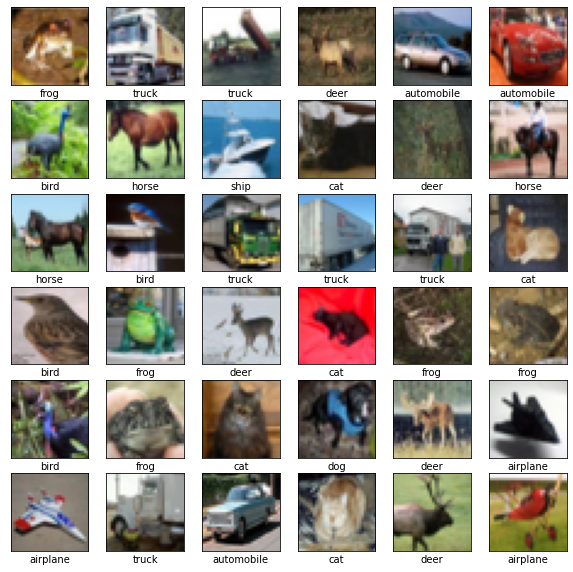

In [ ]:
plt.figure(figsize=(10,10))
for i in range(36):
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
  plt.xlabel(classes[np.argmax(y_train[i])])
plt.show

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(784,activation='relu'))
model.add(Dense(784,activation='relu'))
model.add(Dense(15,activation='Softmax'))
model.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 3072)              0         
                                                                 
 dense_48 (Dense)            (None, 784)               2409232   
                                                                 
 dense_49 (Dense)            (None, 784)               615440    
                                                                 
 dense_50 (Dense)            (None, 15)                11775     
                                                                 
Total params: 3,036,447
Trainable params: 3,036,447
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=128,epochs=50,verbose=1,validation_data=(x_test,y_test))


Epoch 1/50
391/391 [==============================] - 17s 43ms/step - loss: 1.8354 - accuracy: 0.3444 - val_loss: 1.6491 - val_accuracy: 0.4053
Epoch 2/50
391/391 [==============================] - 17s 44ms/step - loss: 1.6344 - accuracy: 0.4210 - val_loss: 1.6157 - val_accuracy: 0.4217
Epoch 3/50
391/391 [==============================] - 17s 43ms/step - loss: 1.5444 - accuracy: 0.4529 - val_loss: 1.5256 - val_accuracy: 0.4520
Epoch 4/50
391/391 [==============================] - 17s 42ms/step - loss: 1.4919 - accuracy: 0.4701 - val_loss: 1.5284 - val_accuracy: 0.4641
Epoch 5/50
391/391 [==============================] - 17s 45ms/step - loss: 1.4419 - accuracy: 0.4875 - val_loss: 1.5335 - val_accuracy: 0.4612
Epoch 6/50
391/391 [==============================] - 16s 42ms/step - loss: 1.4023 - accuracy: 0.5009 - val_loss: 1.4270 - val_accuracy: 0.4868
Epoch 7/50
391/391 [==============================] - 17s 45ms/step - loss: 1.3593 - accuracy: 0.5180 - val_loss: 1.4328 - val_accuracy:

In [ ]:
model.save('/content/drive/MyDrive/dulieuAI/cifar10/train_cifar10.h5')

In [ ]:
#so 0 may bay , 1 xe hoi ,2 chim,3 meo ,4 nai,5 cho, 6 ech, 7 ngua, 8 tau thuy, 9 xe tai
img=load_img('meo1.png',target_size=(32,32))
img=img_to_array(img)
img=img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)

array([3])

In [ ]:
score=model.evaluate(x_test,y_test,verbose=1)
print("do chinh xac = ",score[1])

313/313 [==============================] - 3s 9ms/step - loss: 2.0382 - accuracy: 0.5499
do chinh xac =  0.5498999953269958


#cifar100


In [ ]:
from keras.datasets import cifar10
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.models import load_model
from keras.datasets import cifar100


In [ ]:
(x_train,y_train),(x_test,y_test)=cifar100.load_data()

169017344/169001437 [==============================] - 3s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [ ]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
y_train=to_categorical(y_train,100)
y_test=to_categorical(y_test,100)

<function matplotlib.pyplot.show>

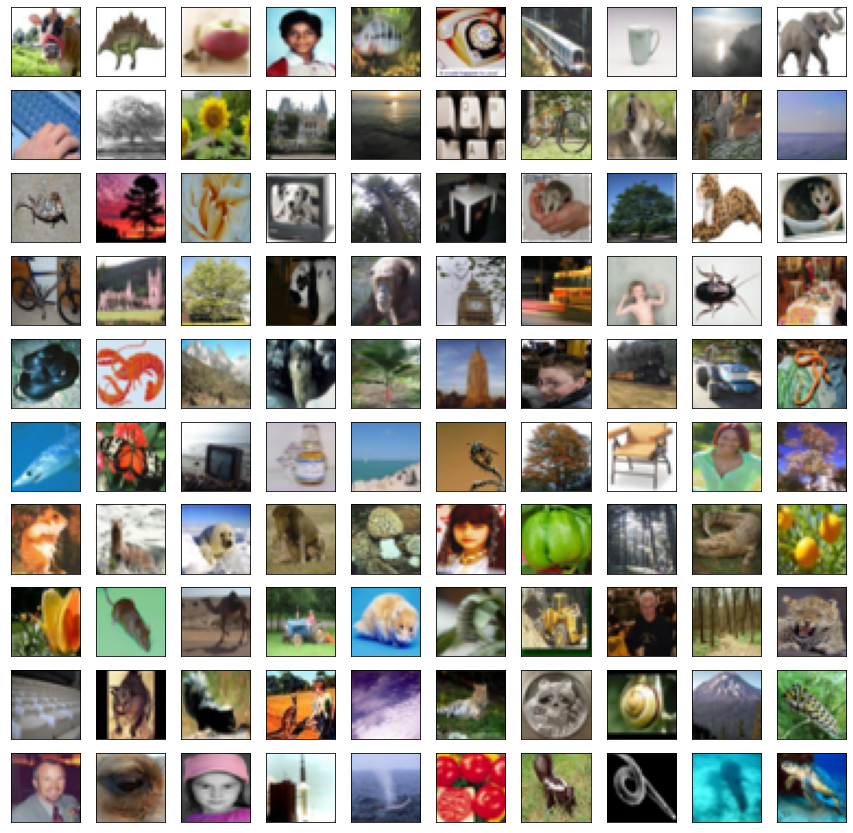

In [ ]:
plt.figure(figsize=(15,15))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
  
plt.show

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(784,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(100,activation='Softmax'))
model.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 3072)              0         
                                                                 
 dense_36 (Dense)            (None, 784)               2409232   
                                                                 
 dense_37 (Dense)            (None, 512)               401920    
                                                                 
 dense_38 (Dense)            (None, 100)               51300     
                                                                 
Total params: 2,862,452
Trainable params: 2,862,452
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt=SGD(learning_rate=0.005,momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])


In [ ]:
history=model.fit(x_train,y_train,batch_size=128,epochs=50,verbose=1,validation_data=(x_test,y_test))

Epoch 1/50
391/391 [==============================] - 22s 54ms/step - loss: 4.1782 - accuracy: 0.0735 - val_loss: 3.9019 - val_accuracy: 0.1125
Epoch 2/50
391/391 [==============================] - 21s 53ms/step - loss: 3.7742 - accuracy: 0.1335 - val_loss: 3.7150 - val_accuracy: 0.1417
Epoch 3/50
391/391 [==============================] - 21s 53ms/step - loss: 3.6173 - accuracy: 0.1610 - val_loss: 3.5951 - val_accuracy: 0.1670
Epoch 4/50
391/391 [==============================] - 20s 52ms/step - loss: 3.5107 - accuracy: 0.1793 - val_loss: 3.5321 - val_accuracy: 0.1806
Epoch 5/50
391/391 [==============================] - 25s 65ms/step - loss: 3.4177 - accuracy: 0.1990 - val_loss: 3.5066 - val_accuracy: 0.1800
Epoch 6/50
391/391 [==============================] - 20s 52ms/step - loss: 3.3396 - accuracy: 0.2095 - val_loss: 3.4192 - val_accuracy: 0.2026
Epoch 7/50
391/391 [==============================] - 20s 52ms/step - loss: 3.2656 - accuracy: 0.2247 - val_loss: 3.3774 - val_accuracy:

In [ ]:
score=model.evaluate(x_test,y_test,verbose=1)
print("do chinh xac = ",score[1])

313/313 [==============================] - 3s 11ms/step - loss: 3.6070 - accuracy: 0.2719
do chinh xac =  0.2718999981880188


In [ ]:
model.save('/content/drive/MyDrive/dulieuAI/cifar100/train_cifar100.h5')

# Fashion


In [ ]:
from keras.datasets import fashion_mnist
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from keras.backend import categorical_crossentropy
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Flatten

In [ ]:
(x_train,y_train),(x_test,y_test)= fashion_mnist.load_data()
x_test_bft=x_test

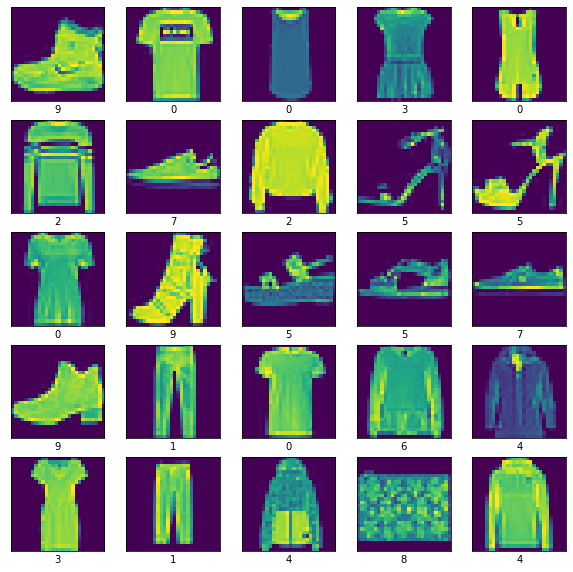

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([]) 
  plt.imshow(x_train[i])
  plt.xlabel(y_train[i])
plt.show()

In [ ]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [ ]:
model = Sequential()
model.add(Dense(128,activation='relu',input_shape=(784,)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='Softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 128)               100480    
                                                                 
 dense_22 (Dense)            (None, 128)               16512     
                                                                 
 dense_23 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


In [ ]:
 model.fit(x_train,y_train,batch_size=128,epochs=1,verbose=10,validation_data=(x_test,y_test))

In [ ]:
score=model.evaluate(x_test,y_test,verbose=1)
print("do chinh xac = ",score[1])

313/313 [==============================] - 0s 2ms/step - loss: 0.4231 - accuracy: 0.8458
do chinh xac =  0.84579998254776


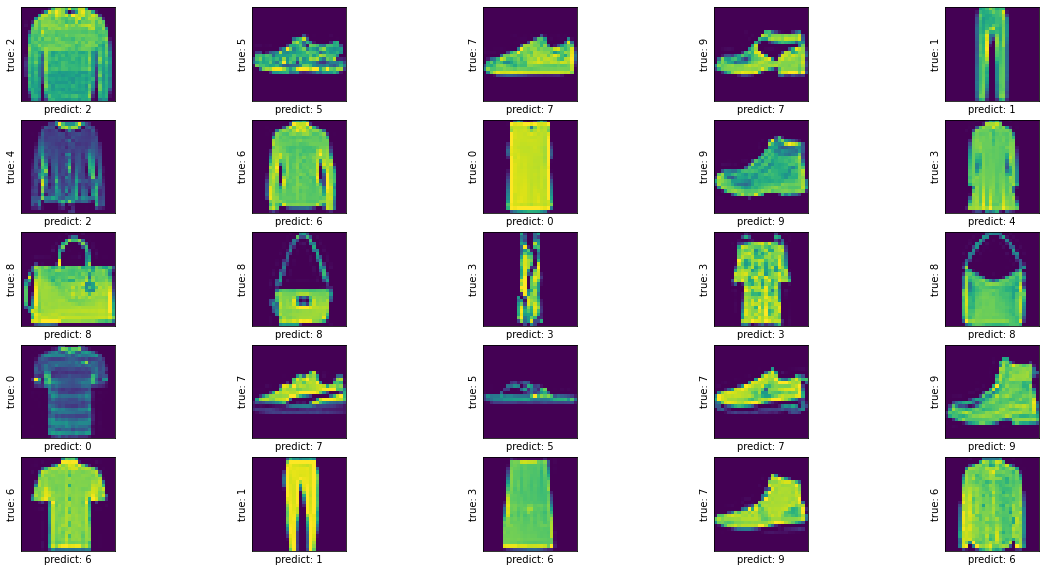

In [ ]:

y_pred = model.predict(x_test)
plt.figure(figsize=(20,10))
for i in range(20,45,1):
  plt.subplot(5,5,i+1-20)
  plt.imshow(x_test_bft[i])
  plt.xticks([])
  plt.yticks([]) 
  plt.xlabel("predict: "+str(np.argmax(y_pred[i])))
  plt.ylabel("true: "+str(np.argmax(y_test[i])))
plt.show()

8


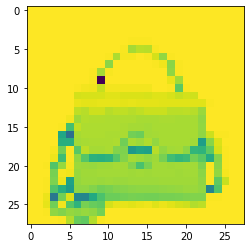

In [ ]:
url='/content/tui xach.jfif'
img=load_img(url,target_size=(28,28),color_mode="grayscale")
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,784)
img=img/255.0
print(np.argmax(model.predict(img)))

In [ ]:
model.save('/content/drive/MyDrive/dulieuAI/fashion/train_fashion.h5')

In [ ]:
load_model('/content/drive/MyDrive/dulieuAI/fashion/train_fashion.h5')

#FACEID_GROUP



In [156]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [177]:
trainset='/content/drive/MyDrive/Colab Notebooks/GROUP/train'

In [178]:
train=ImageDataGenerator(rescale=1./255,validation_split=0.1)

In [179]:
train_data=train.flow_from_directory(
    trainset,
    
    target_size=(150,150),
    batch_size=20,
    class_mode='categorical',
    subset="training",
    shuffle=True, 
   )
validation_set=train.flow_from_directory(
   trainset,
    target_size=(150,150),
    batch_size=20,
    class_mode='categorical',
    shuffle=True,
    subset="validation",
    )

Found 104 images belonging to 4 classes.
Found 10 images belonging to 4 classes.


In [180]:
print(train_data.class_indices)
print(validation_set.class_indices)

{'binh': 0, 'others': 1, 'tien': 2, 'trieu': 3}
{'binh': 0, 'others': 1, 'tien': 2, 'trieu': 3}


In [181]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(4,activation='softmax'))

In [182]:

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [183]:
history=model.fit(train_data,batch_size=20,epochs=5,verbose=1,validation_data=validation_set)

Epoch 1/5
6/6 [==============================] - 26s 4s/step - loss: 135.2088 - accuracy: 0.2885 - val_loss: 2.5975 - val_accuracy: 0.3000
Epoch 2/5
6/6 [==============================] - 23s 4s/step - loss: 2.0112 - accuracy: 0.4135 - val_loss: 1.7590 - val_accuracy: 0.5000
Epoch 3/5
6/6 [==============================] - 24s 4s/step - loss: 1.8327 - accuracy: 0.5769 - val_loss: 8.1037 - val_accuracy: 0.2000
Epoch 4/5
6/6 [==============================] - 23s 4s/step - loss: 1.9172 - accuracy: 0.7596 - val_loss: 3.4471 - val_accuracy: 0.6000
Epoch 5/5
6/6 [==============================] - 24s 4s/step - loss: 0.6770 - accuracy: 0.7981 - val_loss: 0.2199 - val_accuracy: 0.9000


In [191]:
model.save('/content/drive/MyDrive/dulieuAI/faceid_group/group.h5')

In [192]:
test_url= '/content/drive/MyDrive/Colab Notebooks/TEST_GROUP'
test=ImageDataGenerator(rescale=1./255)

In [186]:
score=model.evaluate(validation_set,verbose=1)
print("test accuracy = ",score[1])

1/1 [==============================] - 1s 1s/step - loss: 0.2199 - accuracy: 0.9000
test accuracy =  0.8999999761581421


In [193]:
test_data=test.flow_from_directory(
    test_url,
    target_size=(150,150),
    batch_size=10,
    class_mode='categorical',
    shuffle=False, 
   )

Found 14 images belonging to 1 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


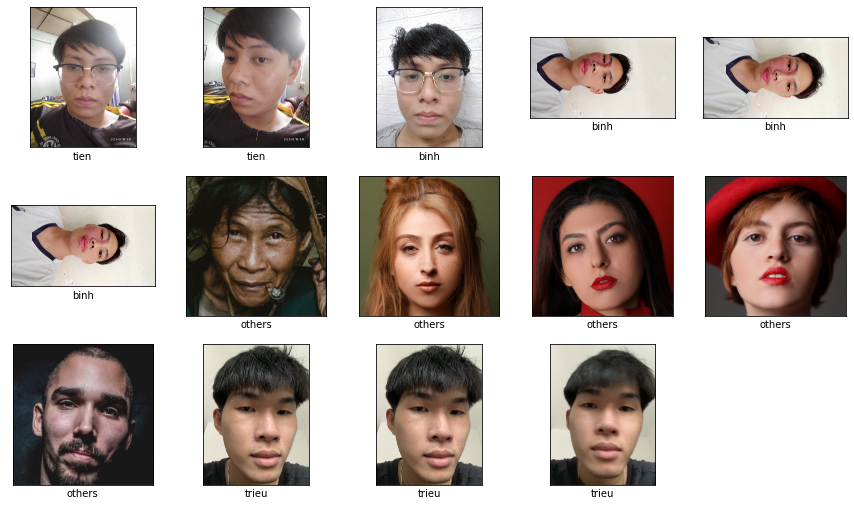

In [194]:
results={ 0:'binh',2:'tien',3:'trieu',1:'others'}
pred = model.predict_generator(test_data)
plt.figure(figsize=(15,15))
for i in range(pred.shape[0]):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(load_img(test_data.filepaths[i]))
  plt.xlabel(results[np.argmax(pred[i])])
plt.show()

#2DOF

In [126]:
import math as ma
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD,Adam
l1=50
l2=40
data=pd.DataFrame()
data_test=pd.DataFrame()



In [127]:
Px=[]
Py=[]
goctt1=[]
goctt2=[]
for tt1 in range(-180,180,1):
  for tt2 in range(-180,180,1):
    goctt1.append((tt1*ma.pi)/180)
    goctt2.append((tt2*ma.pi)/180)
    theta1=(tt1*ma.pi)/180 
    theta2=(tt2*ma.pi)/180
    Px.append(l1*ma.cos(theta1)+l2*ma.cos(theta1+theta2))
    Py.append(l1*ma.sin(theta1)+l2*ma.sin(theta1+theta2))
   
    

In [128]:
data['theta1']=goctt1
data['theta2']=goctt2
data['Px']=Px
data['Py']=Py
data

,theta1,theta2,Px,Py
0,-3.141593,-3.141593,-10.000000,3.673940e-15
1,-3.141593,-3.124139,-10.006092,6.980963e-01
2,-3.141593,-3.106686,-10.024367,1.395980e+00
3,-3.141593,-3.089233,-10.054819,2.093438e+00
4,-3.141593,-3.071779,-10.097438,2.790259e+00
...,...,...,...,...
129595,3.124139,3.054326,-10.211509,-3.308518e+00
129596,3.124139,3.071779,-10.144597,-2.613609e+00
129597,3.124139,3.089233,-10.089823,-1.917639e+00
129598,3.124139,3.106686,-10.047203,-1.220818e+00


In [129]:
x=data.drop(data.columns[0:2],axis=1)
y=data.drop(data.columns[2:4],axis=1)


In [144]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [145]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(116640, 2)
(116640, 2)
(12960, 2)
(12960, 2)


In [147]:
model = Sequential()
model.add(Dense(784,activation='relu',input_shape=(2,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2))

In [150]:


model.compile(loss='mse',optimizer='Adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=128,epochs=20,verbose=1,validation_data=(x_test,y_test))

Epoch 1/20
912/912 [==============================] - 11s 12ms/step - loss: 2.4551 - accuracy: 0.6467 - val_loss: 2.4003 - val_accuracy: 0.6482
Epoch 2/20
912/912 [==============================] - 10s 11ms/step - loss: 2.4577 - accuracy: 0.6469 - val_loss: 2.3997 - val_accuracy: 0.6495
Epoch 3/20
912/912 [==============================] - 10s 11ms/step - loss: 2.4552 - accuracy: 0.6472 - val_loss: 2.3963 - val_accuracy: 0.6549
Epoch 4/20
912/912 [==============================] - 10s 11ms/step - loss: 2.4521 - accuracy: 0.6484 - val_loss: 2.3893 - val_accuracy: 0.6511
Epoch 5/20
912/912 [==============================] - 12s 14ms/step - loss: 2.4531 - accuracy: 0.6483 - val_loss: 2.4010 - val_accuracy: 0.6478
Epoch 6/20
912/912 [==============================] - 10s 11ms/step - loss: 2.4519 - accuracy: 0.6473 - val_loss: 2.3977 - val_accuracy: 0.6492
Epoch 7/20
912/912 [==============================] - 15s 16ms/step - loss: 2.4523 - accuracy: 0.6464 - val_loss: 2.4095 - val_accuracy:

In [151]:
score=model.evaluate(x_test,y_test,verbose=1)
print("do chinh xac = ",score[1])

405/405 [==============================] - 1s 2ms/step - loss: 2.3836 - accuracy: 0.6533
do chinh xac =  0.653317928314209


In [153]:
model.predict(x_test)

array([[ 1.1360483 , -0.02656918],
       [ 0.4042799 , -0.00816995],
       [-0.06821401,  0.005593  ],
       ...,
       [ 1.3017875 ,  0.0310293 ],
       [-0.851888  , -0.05501121],
       [ 0.48454309, -0.0148577 ]], dtype=float32)

In [154]:
y_test

,theta1,theta2
84956,0.959931,3.071779
121657,2.740167,2.740167
70690,0.279253,-0.872665
70362,0.261799,-0.314159
126203,2.967060,0.401426
...,...,...
103788,1.884956,-1.256637
26821,-1.850049,0.017453
79805,0.715585,1.134464
56610,-0.401426,-1.570796


In [152]:
model.save('/content/drive/MyDrive/dulieuAI/2dof/train_2dof.h5')

#FACEID_PERSONAL


In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [ ]:
trainset='/content/drive/MyDrive/Colab Notebooks/PERSONAL/train'

In [ ]:
data_generator = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [ ]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(150,150),
                                     batch_size=10,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(150,150),
                                              batch_size=10,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 143 images belonging to 2 classes.
Found 35 images belonging to 2 classes.


In [ ]:
validation_set.class_indices

{'kptien': 0, 'tien': 1}

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(150,150,3)))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history=model.fit(train_dataset,batch_size=10,epochs=10,verbose=1,validation_data=validation_set)

Epoch 1/10
15/15 [==============================] - 13s 909ms/step - loss: 24.3184 - accuracy: 0.7042 - val_loss: 58.7262 - val_accuracy: 0.6857
Epoch 2/10
15/15 [==============================] - 12s 796ms/step - loss: 20.1690 - accuracy: 0.6831 - val_loss: 9.9959 - val_accuracy: 0.6857
Epoch 3/10
15/15 [==============================] - 12s 797ms/step - loss: 8.8204 - accuracy: 0.7535 - val_loss: 3.6893 - val_accuracy: 0.7143
Epoch 4/10
15/15 [==============================] - 12s 814ms/step - loss: 2.8542 - accuracy: 0.8944 - val_loss: 9.4829 - val_accuracy: 0.6857
Epoch 5/10
15/15 [==============================] - 12s 803ms/step - loss: 1.7790 - accuracy: 0.9085 - val_loss: 5.6645 - val_accuracy: 0.7143
Epoch 6/10
15/15 [==============================] - 12s 803ms/step - loss: 1.3983 - accuracy: 0.8873 - val_loss: 3.1086 - val_accuracy: 0.7429
Epoch 7/10
15/15 [==============================] - 12s 818ms/step - loss: 1.6625 - accuracy: 0.9225 - val_loss: 8.2078 - val_accuracy: 0.6

In [ ]:
score=model.evaluate(validation_set,verbose=1)
print("test accuracy = ",score[1])

4/4 [==============================] - 4s 1s/step - loss: 0.7594 - accuracy: 0.7714
test accuracy =  0.7714285850524902


In [ ]:
model.save('/content/drive/MyDrive/dulieuAI/faceid_personal/personal.h5')

In [ ]:
load_model('/content/drive/MyDrive/dulieuAI/faceid_personal/personal.h5')

0


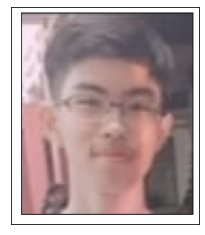

In [ ]:
url='/content/trung.png' # 1 la tien, 0 la kptien
img=load_img(url,target_size=(150,150))
plt.imshow(load_img(url))
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img/255.0
print(np.argmax(model.predict(img)))

In [ ]:
test_url= '/content/drive/MyDrive/Colab Notebooks/TEST_PERSONAL'
test=ImageDataGenerator(rescale=1./255)

In [ ]:
test_data=test.flow_from_directory(
    test_url,
    target_size=(150,150),
    batch_size=15,
    class_mode='categorical',
    shuffle=False, 
   )

Found 23 images belonging to 1 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


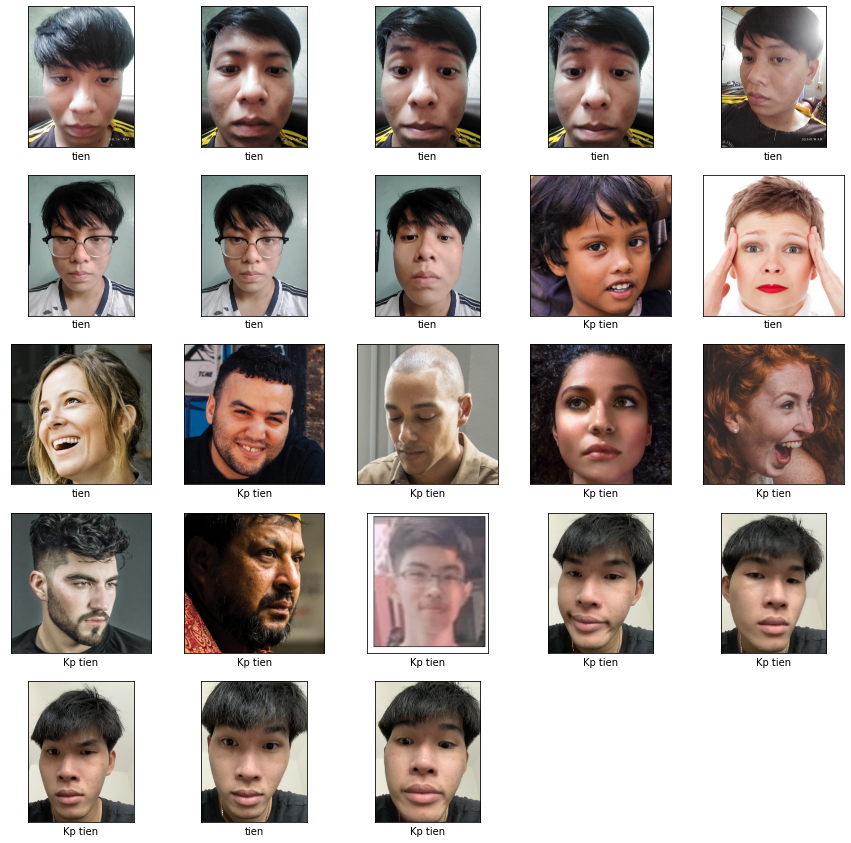

In [ ]:
results={ 0:'Kp tien',1:'tien'}
pred = model.predict_generator(test_data)
plt.figure(figsize=(15,15))
for i in range(pred.shape[0]):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(load_img(test_data.filepaths[i]))
  plt.xlabel(results[np.argmax(pred[i])])
plt.show()

#3D0F


In [112]:
import math as ma
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD,Adam
from keras.callbacks import EarlyStopping
l1=50
l2=40
l3=20
data=pd.DataFrame()

In [113]:
Px=[]
Py=[]
goctt1=[]
goctt2=[]
goctt3=[]
gocphi=[]
for phi in range(0,90,45):
  for tt1 in range(-180,180 ,1):
    for tt2 in range(-180,180,1):
     theta1=(tt1*ma.pi)/180 
     theta2=(tt2*ma.pi)/180
     a=((phi*ma.pi)/180)-theta1-theta2 # phi = theta1 + theta2 + theta3 ====> theta3=a=phi(rad) - theta1 - theta2
     Px.append(l1*ma.cos(theta1)+l2*ma.cos(theta1+theta2+a)+l3*ma.cos(theta1+theta2))
     Py.append(l1*ma.sin(theta1)+l2*ma.sin(theta1+theta2+a)+l3*ma.sin(theta1+theta2))
     goctt1.append(theta1)
     goctt2.append(theta2)
     goctt3.append((phi*ma.pi)/180)
     gocphi.append(a)
   
    

In [ ]:
data['theta1']=goctt1
data['theta2']=goctt2
data['theta3']=goctt3
data['phi']=gocphi
data['Px']=Px
data['Py']=Py
data

,theta1,theta2,theta3,phi,Px,Py
0,-3.141593,-3.141593,0.000000,6.283185,10.000000,-1.224647e-15
1,-3.141593,-3.124139,0.000000,6.265732,9.996954,3.490481e-01
2,-3.141593,-3.106686,0.000000,6.248279,9.987817,6.979899e-01
3,-3.141593,-3.089233,0.000000,6.230825,9.972591,1.046719e+00
4,-3.141593,-3.071779,0.000000,6.213372,9.951281,1.395129e+00
...,...,...,...,...,...,...
259195,3.124139,3.054326,0.785398,-5.393067,-1.817676,2.706632e+01
259196,3.124139,3.071779,0.785398,-5.410521,-1.784220,2.741378e+01
259197,3.124139,3.089233,0.785398,-5.427974,-1.756833,2.776176e+01
259198,3.124139,3.106686,0.785398,-5.445427,-1.735523,2.811017e+01


In [ ]:
y = data.drop(['Px','Py','phi'],axis=1)
x = data.drop(['theta1','theta2','theta3'],axis=1)
print(y)
print(x)

          theta1    theta2    theta3
0      -3.141593 -3.141593  0.000000
1      -3.141593 -3.124139  0.000000
2      -3.141593 -3.106686  0.000000
3      -3.141593 -3.089233  0.000000
4      -3.141593 -3.071779  0.000000
...          ...       ...       ...
259195  3.124139  3.054326  0.785398
259196  3.124139  3.071779  0.785398
259197  3.124139  3.089233  0.785398
259198  3.124139  3.106686  0.785398
259199  3.124139  3.124139  0.785398

[259200 rows x 3 columns]
             phi         Px            Py
0       6.283185  10.000000 -1.224647e-15
1       6.265732   9.996954  3.490481e-01
2       6.248279   9.987817  6.979899e-01
3       6.230825   9.972591  1.046719e+00
4       6.213372   9.951281  1.395129e+00
...          ...        ...           ...
259195 -5.393067  -1.817676  2.706632e+01
259196 -5.410521  -1.784220  2.741378e+01
259197 -5.427974  -1.756833  2.776176e+01
259198 -5.445427  -1.735523  2.811017e+01
259199 -5.462881  -1.720297  2.845890e+01

[259200 rows x 3 columns

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = Sequential()
model.add(Dense(1000,activation='relu',input_shape=(3,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(3))

model.compile(loss='mse',optimizer='Adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=256,epochs=50,verbose=1,validation_data=(x_test,y_test))

810/810 [==============================] - 25s 31ms/step - loss: 0.0202 - accuracy: 0.9655 - val_loss: 0.0215 - val_accuracy: 0.9636
Epoch 21/50
810/810 [==============================] - 25s 31ms/step - loss: 0.0188 - accuracy: 0.9669 - val_loss: 0.0149 - val_accuracy: 0.9742
Epoch 22/50
810/810 [==============================] - 28s 35ms/step - loss: 0.0185 - accuracy: 0.9679 - val_loss: 0.0161 - val_accuracy: 0.9786
Epoch 23/50
810/810 [==============================] - 29s 36ms/step - loss: 0.0183 - accuracy: 0.9686 - val_loss: 0.0148 - val_accuracy: 0.9728
Epoch 24/50
810/810 [==============================] - 28s 35ms/step - loss: 0.0177 - accuracy: 0.9690 - val_loss: 0.0209 - val_accuracy: 0.9687
Epoch 25/50
810/810 [==============================] - 25s 30ms/step - loss: 0.0178 - accuracy: 0.9683 - val_loss: 0.0216 - val_accuracy: 0.9550
Epoch 26/50
810/810 [==============================] - 29s 36ms/step - loss: 0.0179 - accuracy: 0.9690 - val_loss: 0.0220 - val_accuracy: 0.96

In [ ]:
model.save('/content/drive/MyDrive/dulieuAI/3dof/train_3dof.h5')

In [ ]:
model.predict(x_test)

array([[-1.5661552 ,  0.76725525, -0.02954522],
       [ 3.050907  , -0.47723123, -0.046578  ],
       [ 2.5900958 , -2.8817291 ,  0.73491025],
       ...,
       [-1.3681259 , -2.7098234 ,  0.81531334],
       [ 1.0578697 , -2.7513313 ,  0.77754337],
       [ 1.8542465 , -0.72449183,  0.77598214]], dtype=float32)

In [ ]:
y_test

,theta1,theta2,theta3
33343,-1.535890,0.750492,0.000000
128319,3.071779,-0.366519,0.000000
245905,2.495821,-2.705260,0.785398
44602,-0.994838,2.478368,0.000000
79353,0.698132,-0.471239,0.000000
...,...,...,...
77839,0.628319,-1.762783,0.000000
176825,-0.855211,-2.007129,0.785398
165625,-1.396263,-2.705260,0.785398
215304,1.012291,-2.722714,0.785398


# convert pdf



In [155]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('baitapAI_ANN.ipynb')